# Generating dataset

In [ ]:
import os
import pandas as pd
import re

def get_folder_names(folder_path):
    """
    Function to iterate over a list of folders in a folder path and append the names to a list.

    Parameters:
    folder_path (str): The path to the folder containing the subfolders.

    Returns:
    list: A list of the names of the subfolders.
    """
    folders = []
    for dirpath, dirnames, filenames in os.walk(folder_path):
        for dirname in dirnames:
            folders.append(dirname)
    return folders


def get_txt_data(folder_path):
    """
    Function to iterate over each .txt file in the subfolders of a given folder path,
    retrieve the 'Title' text and 'Abstract' text of each file, and append them to individual lists.

    Parameters:
    folder_path (str): The path to the folder containing the subfolders and .txt files.

    Returns:
    tuple: A tuple containing three lists: one for the 'Title' text of each file, one for the 'Abstract' text of each file, and one for the 'PMID' or filename of each file.
    """
    titles = []
    abstracts = []
    pmids = []
    for dirpath, dirnames, filenames in os.walk(folder_path):
        for filename in filenames:
            if filename.endswith('.txt'):
                with open(os.path.join(dirpath, filename), 'r') as file:
                    lines = file.readlines()
                    title = lines[0].strip()
                    abstract = ''.join(lines[1:]).strip()
                    pmid = os.path.splitext(filename)[0]
                    titles.append(title)
                    abstracts.append(abstract)
                    pmids.append(pmid)
    return titles, abstracts, pmids


def get_text_data(file_path):
    """
    Function to extract the 'Title' and 'Abstract' texts from a given .txt file.

    Parameters:
    file_path (str): The path to the .txt file.

    Returns:
    tuple: A tuple containing the 'Title' text, 'Abstract' text, and the 'PMID' (which is the same as the file name).
    """
    with open(file_path, 'r') as f:
        text = f.read()
        match = re.search(r'^Title:(.+)$', text, flags=re.MULTILINE)
        title = match.group(1).strip() if match else ''
        match = re.search(r'^Abstract:(.+)$', text, flags=re.MULTILINE)
        abstract = match.group(1).strip() if match else ''
        pmid = os.path.splitext(os.path.basename(file_path))[0]
        
        # print('PMID:', pmid)
        # print('Title:', title)
        # print('Abstract:', abstract)
        
    return title, abstract, pmid


def create_dataframe(folder_path):
    """
    Function to create a pandas data frame with the headers 'Biofilm growth mechanism', 'PMID', 'Title', and 'Abstract',
    where each row represents a file in the folders of the given folder path and its associated metadata.

    Parameters:
    folder_path (str): The path to the folder containing the folders and .txt files.

    Returns:
    pandas.DataFrame: A data frame containing the metadata for each file in each folder.
    """
    titles = []
    abstracts = []
    pmids = []
    biofilm = []
    subdirs = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]
    for subdir in subdirs:
        subdir_path = os.path.join(folder_path, subdir)
        for txt_file in os.listdir(subdir_path):
            if txt_file.endswith('.txt'):
                txt_path = os.path.join(subdir_path, txt_file)
                title, abstract, pmid = get_text_data(txt_path)
                titles.append(title)
                abstracts.append(abstract)
                pmids.append(pmid)
                biofilm.append(subdir)
    data = {'Biofilm growth mechanism': biofilm, 'PMID': pmids, 'Title': titles, 'Abstract': abstracts}
    df = pd.DataFrame(data)
    return df


def save_dataframe_as_csv(dataframe, filename):
    """
    Function to save a pandas data frame as a CSV file.

    Parameters:
    dataframe (pandas.DataFrame): The data frame to be saved.
    filename (str): The name to be given to the CSV file.

    Returns:
    None
    """
    dataframe.to_csv(filename, index=False)

# # Example usage:
folder_path = './Biofilm growth mechanisms'
df = create_dataframe(folder_path)
save_dataframe_as_csv(df, 'dataset.csv')

# data = create_dataframe(folder_path)
# for i in data['Title']:
#     print(lei)

# Dataset overview 

In [8]:
data = pd.read_csv(r'dataset.csv')

In [9]:
title = data['Title']

In [10]:
abs = data['Abstract']

In [11]:
print(title[0],'\n\n',abs[0])

Insights into the temperature responses of Pseudomonas species in beneficial and pathogenic host interactions. 

 Pseudomonas species are metabolically versatile bacteria able to exploit a wide range of ecological niches. Different Pseudomonas species can grow as free-living cells, biofilms, or associated with plants or animals, including humans, and their ecological success partially lies in their ability to grow and adapt to different temperatures. These bacteria are relevant for human activities, due to their clinical importance and their biotechnological potential for different applications such as bioremediation and the production of biopolymers, surfactants, secondary metabolites, and enzymes. In agriculture, some of them can act as plant growth promoters and are thus used as inoculants, whereas others, like P. syringae pathovars, can cause disease in commercial crops. This review aims to provide an overview of the temperature-response mechanisms in Pseudomonas species, looking f

In [8]:
# Get a count of the unique values in the 'Biofilm growth mechanism' column
counts = data['Biofilm growth mechanism'].value_counts()

# Print the counts for each unique value
for biofilm, count in counts.items():
    print(f"{biofilm}: {count}")

# Print the total count of papers
total_count = counts.sum()
print(f"Total count: {total_count}")


Biofilm decay: 10
Microcolony: 10
Flagella attachment: 10
Biofilm maturation: 10
Colonization: 10
Conditioning: 10
Cytochrome: 9
Exopolysaccharide: 9
Cell-to-cell: 9
Corrosion mechanisms: 9
Quorum-sensing: 8
Adaptive response: 8
Biofilm growth: 8
Antimicrobial tolerance: 7
Extracellular: 7
Extracellular DNA: 7
Dispersal of biofilm: 5
Biofilm matrix: 5
Phenotypic response: 5
Reversible cell attachment: 4
Biofilm matrix production: 3
Formation of microcolonies: 1
Irreversible cell attachment: 1
Total count: 165


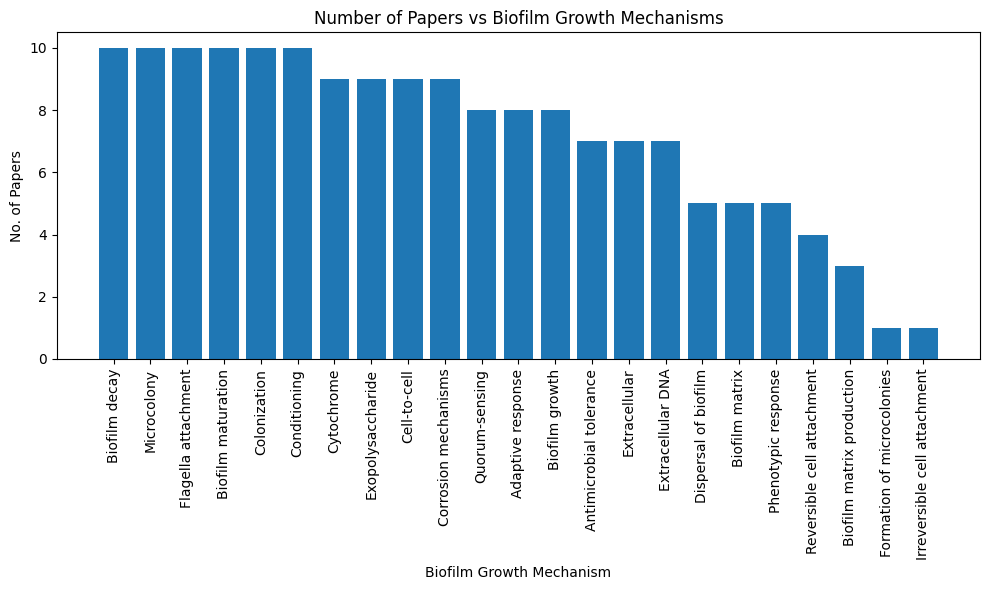

In [10]:
import matplotlib.pyplot as plt

# Get a count of the unique values in the 'Biofilm growth mechanism' column
counts = data['Biofilm growth mechanism'].value_counts()

# Extract the biofilm growth mechanisms and their corresponding counts
biofilm_growth_mechanisms = counts.index
paper_counts = counts.values

# Create a bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(biofilm_growth_mechanisms, paper_counts)

# Set the labels and title
plt.xlabel('Biofilm Growth Mechanism')
plt.ylabel('No. of Papers')
plt.title('Number of Papers vs Biofilm Growth Mechanisms')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)  # Adjust the rotation angle as needed

# Display the graph
plt.tight_layout()  # Optional: improve spacing between elements
plt.show()


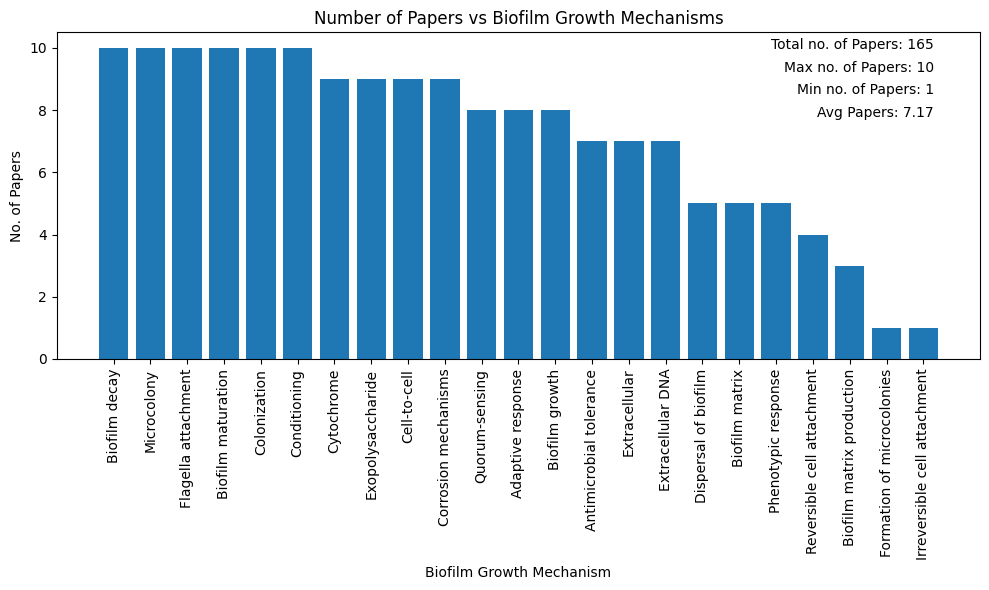

In [16]:
import matplotlib.pyplot as plt

# Get a count of the unique values in the 'Biofilm growth mechanism' column
counts = data['Biofilm growth mechanism'].value_counts()

# Extract the biofilm growth mechanisms and their corresponding counts
biofilm_growth_mechanisms = counts.index
paper_counts = counts.values

# Calculate the required statistics
total_papers = paper_counts.sum()
max_papers = paper_counts.max()
min_papers = paper_counts.min()
average_papers = paper_counts.mean()

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(biofilm_growth_mechanisms, paper_counts)

# Set the labels and title
plt.xlabel('Biofilm Growth Mechanism')
plt.ylabel('No. of Papers')
plt.title('Number of Papers vs Biofilm Growth Mechanisms')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add text annotations for the statistics at the top right corner
plt.text(0.95, 0.95, f"Total no. of Papers: {total_papers}", transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.88, f"Max no. of Papers: {max_papers}", transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.81, f"Min no. of Papers: {min_papers}", transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.74, f"Avg Papers: {average_papers:.2f}", transform=plt.gca().transAxes, ha='right')

# Display the graph
plt.tight_layout()
plt.show()


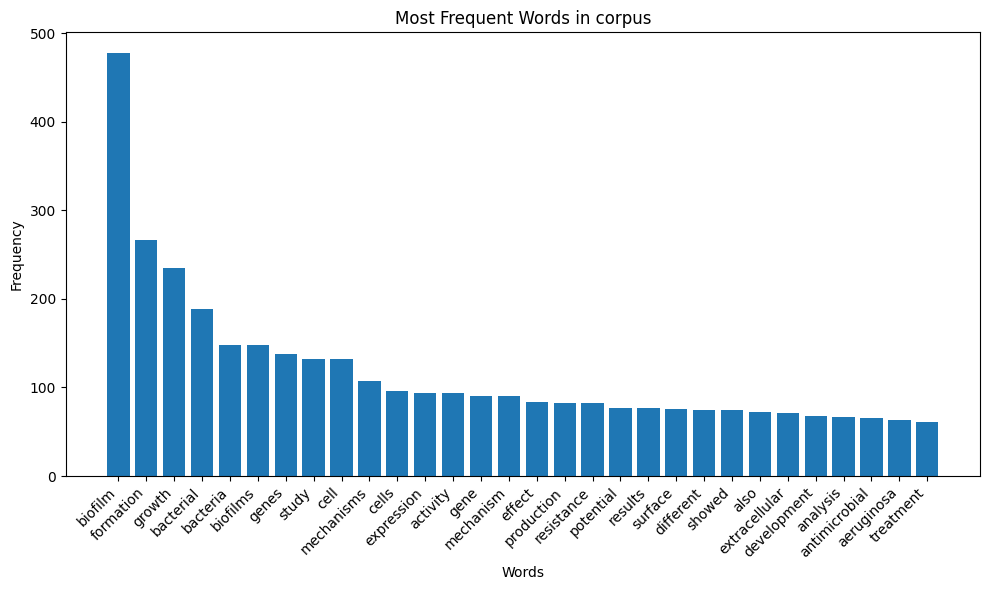

In [25]:
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Combine all abstracts into a single string
all_text = ' '.join(abs)

# Tokenize the text into individual words
tokens = nltk.word_tokenize(all_text)

# Filter out stopwords
stopword_set = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens if word.lower() not in stopword_set and word.isalpha()]

# Count the frequency of each word
word_counts = Counter(filtered_tokens)

# Get the most common words and their frequencies
most_common_words = word_counts.most_common(30)  # Adjust the number as desired

# Extract the words and frequencies for plotting
words = [word for word, count in most_common_words]
frequencies = [count for word, count in most_common_words]

# Create a bar graph of the most frequent words
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)

# Set the labels and title
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Frequent Words in corpus')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment as needed

# Display the graph
plt.tight_layout()
plt.show()
